In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (11, 7)

In [2]:
df =  pd.read_csv('dataFine.csv')

C:\Users\victo\AppData\Local\Temp\ipykernel_11376\4043669217.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv('dataFine.csv')


In [3]:
education_dictionary = {
                            1:'Начальное общее образование',
                            2:'Основное общее образование',
                            3:'Среднее общее образование',
                            4:'Среднее профессиональное образование',
                            6:'Высшее образование',
                            9:'Другое',
                            0:'Нет данных'
                        }
gender_dictionary = {1:'Мужчины', 
                     0: 'Женщины',
                     #По совершенно не понятной мне причине - сбилась именно в этом столбце правка. 
                     #Причём в самом блокноте, где делалась правка - всё нормально. И в других столбцах тоже всё хорошо.
                     #Придётся внести дополнительно - но это какой-то баг
                     '1': 'Мужчины',
                     '0': 'Женщины',
                     'None': 'Не указан'}

In [4]:
data_5_t = pd.pivot_table(df, values="count",index=["year",'month','education','gender', 'hc_didnotwork', 'find_new_job'], aggfunc="sum").reset_index()

In [5]:
data_5_t['education'] = data_5_t['education'].map(education_dictionary)
data_5_t['gender'] = data_5_t['gender'].map(gender_dictionary)

data_5_t

,year,month,education,gender,hc_didnotwork,find_new_job,count
0,2017,Август,Нет данных,Женщины,False,False,4789
1,2017,Август,Нет данных,Женщины,False,True,5832
2,2017,Август,Нет данных,Женщины,True,False,135
3,2017,Август,Нет данных,Женщины,True,True,82
4,2017,Август,Нет данных,Мужчины,False,False,3805
...,...,...,...,...,...,...,...
5192,2020,Январь,Другое,Женщины,True,True,8
5193,2020,Январь,Другое,Мужчины,False,False,158
5194,2020,Январь,Другое,Мужчины,False,True,75
5195,2020,Январь,Другое,Мужчины,True,False,47


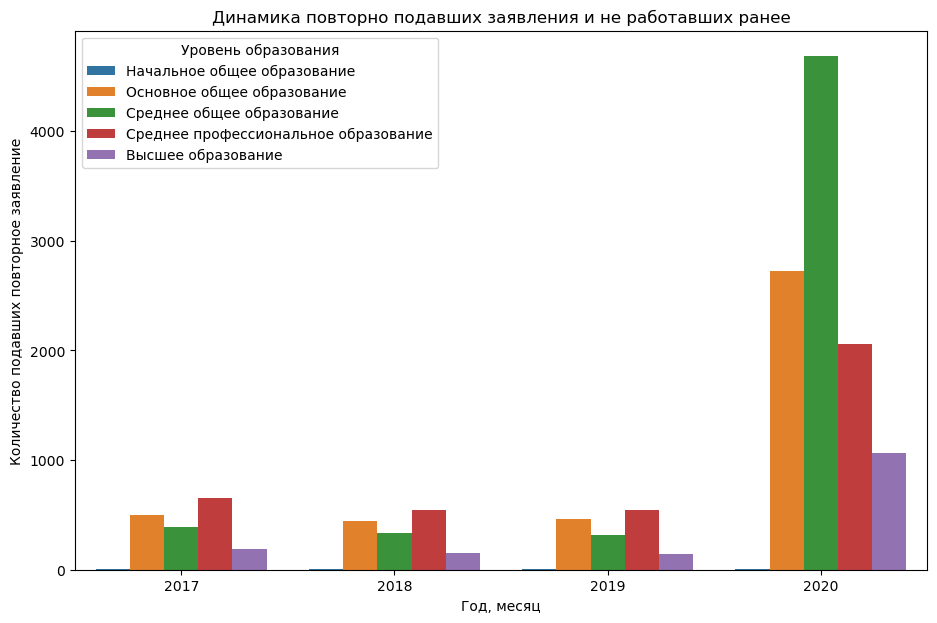

In [13]:
sns.barplot(data=data_5_t[(data_5_t['hc_didnotwork']==True) & (data_5_t['education']!='Нет данных') & (data_5_t['education']!='Другое')],x='year',y='count',hue='education',ci=False).set(xlabel='Год, месяц', ylabel = 'Количество подавших повторное заявление', title = 'Динамика повторно подавших заявления и не работавших ранее')



plt.legend(title='Уровень образования', loc='upper left')
plt.savefig('Task5_1.png')

In [7]:
data_5_t_2= data_5_t[data_5_t['find_new_job']==True].copy()

finded_job = {edu_lev : data_5_t_2[data_5_t_2['education'] == edu_lev]['count'].sum() for edu_lev in data_5_t_2['education'].unique()}

def percentage_per_edu_level(edu_level, count):
    #overall = data_5_t_2[data_5_t_2['education'] == edu_level]['count'].sum()
    overall = finded_job[edu_level]
    return (count / overall * 100).round(2)


In [8]:
data_5_t_2['%_total'] = data_5_t_2.apply(lambda x: percentage_per_edu_level(x["education"],x['count']),axis=1)

In [9]:
table2 = pd.pivot_table(data_5_t_2,values='%_total',index=['gender','education','year', 'month'],aggfunc='sum').reset_index()
table2

,gender,education,year,month,%_total
0,Женщины,Высшее образование,2017,Август,1.51
1,Женщины,Высшее образование,2017,Апрель,1.40
2,Женщины,Высшее образование,2017,Декабрь,1.20
3,Женщины,Высшее образование,2017,Июль,1.52
4,Женщины,Высшее образование,2017,Июнь,1.24
...,...,...,...,...,...
664,Мужчины,Среднее профессиональное образование,2020,Сентябрь,0.36
665,Мужчины,Среднее профессиональное образование,2020,Февраль,0.78
666,Мужчины,Среднее профессиональное образование,2020,Январь,0.96
667,Не указан,Высшее образование,2018,Март,0.00


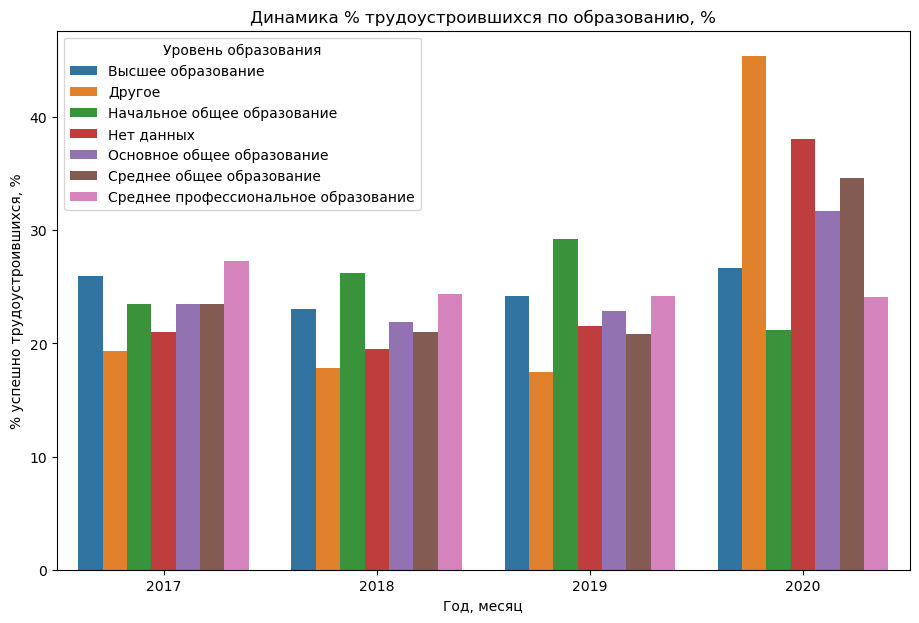

In [11]:
sns.barplot(data=table2,x='year',y='%_total',hue='education',ci=False, estimator = np.sum).set(xlabel='Год, месяц', ylabel = '% успешно трудоустроившихся, %', title = 'Динамика % трудоустроившихся по образованию, %')



plt.legend(title='Уровень образования', loc='upper left')
plt.savefig('Task5_2.png')

In [102]:
table2[(table2['year']==2017) & (table2['education']=='Другое')]['%_total'].max()

1.5